# Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import f_oneway, chi2
from sklearn.covariance import EmpiricalCovariance
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data Preprocessing

In [39]:
#load the codebook file
codebook_path = 'codebook.xlsx'

# Load the Excel files
codebook = pd.read_excel(codebook_path)

# Inspect the first few rows of each dataset to understand their structure
print("Codebook:")
codebook

Codebook:


,Code,Description
0,v_127,Attention Check 1 (How is the AI system presen...
1,v_150,How uneasy does the concept of Maya make you f...
2,v_151,To what extent does Maya make you feel unnerved?
3,v_152,How closely do you think Maya's interactions w...
4,v_153,How creeped out do you feel by the idea of Maya?
5,v_184,How humanlike do you perceive Maya to be?
6,v_168,Masculinity
7,v_169,Feminity
8,v_156,"When I would use Maya, I could act independently."
9,v_157,"When I would use Maya, I would feel like I am ..."


In [40]:
#load the data file
data_file_path = 'data.xlsx'

# Load the Excel files
data_df = pd.read_excel(data_file_path)

# Inspect the first few rows of each dataset to understand their structure
print("Data File:")
print(data_df.head())

Data File:
   v_127  v_150  v_151  v_153  v_152  v_184  v_168  v_169  v_156  v_157  ...  \
0      1      1      1      1      2      2      1      2      5      4  ...   
1      1      1      4      1      5      3      1      4      5      3  ...   
2      1      2      1      1      2      1      1      1      4      5  ...   
3      1      2      1      3      3      2      2      4      4      4  ...   
4      1      1      4      3      3      3      4      2      3      3  ...   

   v_174  v_175  v_176  v_178  v_179  v_180  v_188  v_182  rnd_pg_6705298  \
0      3      2      2    191     27      1      1    -99         6705299   
1      3      2      4    145     21      2      1    -99         6705299   
2      3      2      4     87     24      2      1    -99         6705300   
3      3      2      3    146     24      1      1    -99         6705301   
4      5      2      4    145     21      2      1    -99         6705299   

        Mind Perception  
0          AI as a 

In [41]:
data_df

,v_127,v_150,v_151,v_153,v_152,v_184,v_168,v_169,v_156,v_157,...,v_174,v_175,v_176,v_178,v_179,v_180,v_188,v_182,rnd_pg_6705298,Mind Perception
0,1,1,1,1,2,2,1,2,5,4,...,3,2,2,191,27,1,1,-99,6705299,AI as a Tool
1,1,1,4,1,5,3,1,4,5,3,...,3,2,4,145,21,2,1,-99,6705299,AI as a Tool
2,1,2,1,1,2,1,1,1,4,5,...,3,2,4,87,24,2,1,-99,6705300,AI as an Agent
3,1,2,1,3,3,2,2,4,4,4,...,3,2,3,146,24,1,1,-99,6705301,AI as an Experiencer
4,1,1,4,3,3,3,4,2,3,3,...,5,2,4,145,21,2,1,-99,6705299,AI as a Tool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1,2,1,3,3,3,4,4,4,...,2,1,3,130,27,2,1,AI could be helpful in drug discovery as well ...,6705301,AI as an Experiencer
156,3,2,2,1,3,3,3,3,4,3,...,2,1,3,81,25,1,1,-99,6705299,AI as a Tool
157,3,2,2,2,3,3,1,4,4,4,...,3,2,2,175,24,2,1,The development of emotion capable AI is to me...,6705301,AI as an Experiencer
158,2,2,3,2,3,1,1,1,2,2,...,3,1,2,87,43,2,1,-99,6705301,AI as an Experiencer


In [42]:
# Filter the data to discard rows where column 'v_188 Comprehension Check' has the value 2 i.e. No
filtered_data = data_df[data_df['v_188'] != 2]

# Display the first few rows of the filtered data to verify
print("Filtered Data File:")
print(filtered_data.head())

# Optionally, save the filtered data to a new file
filtered_data.to_excel('filtered_data.xlsx', index=False)

Filtered Data File:
   v_127  v_150  v_151  v_153  v_152  v_184  v_168  v_169  v_156  v_157  ...  \
0      1      1      1      1      2      2      1      2      5      4  ...   
1      1      1      4      1      5      3      1      4      5      3  ...   
2      1      2      1      1      2      1      1      1      4      5  ...   
3      1      2      1      3      3      2      2      4      4      4  ...   
4      1      1      4      3      3      3      4      2      3      3  ...   

   v_174  v_175  v_176  v_178  v_179  v_180  v_188  v_182  rnd_pg_6705298  \
0      3      2      2    191     27      1      1    -99         6705299   
1      3      2      4    145     21      2      1    -99         6705299   
2      3      2      4     87     24      2      1    -99         6705300   
3      3      2      3    146     24      1      1    -99         6705301   
4      5      2      4    145     21      2      1    -99         6705299   

        Mind Perception  
0         

In [43]:
# Define the Mahalanobis distance function
def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

# Select columns for Mahalanobis distance calculation
cols_for_mahal = ['v_150', 'v_151', 'v_153', 'v_152', 'v_184', 'v_156', 'v_157', 'v_158', 'v_159', 'v_160', 'v_161', 'v_162', 'v_163', 'v_164', 'v_165', 'v_166', 'v_167']

# Calculate Mahalanobis distance
filtered_data.loc[:, 'mahalanobis'] = mahalanobis(x=filtered_data[cols_for_mahal], data=filtered_data[cols_for_mahal])

# Calculate p-values
filtered_data.loc[:, 'p_value'] = 1 - chi2.cdf(filtered_data['mahalanobis'], df=len(cols_for_mahal))

# Identify outliers
filtered_data.loc[:, 'outlier'] = filtered_data['p_value'] < 0.001

# Filter out multivariate outliers
data_filtered = filtered_data[filtered_data['p_value'] >= 0.001]

print(f"Original data shape: {filtered_data.shape}")
print(f"Filtered data shape: {data_filtered.shape}")

# Optional: Save filtered data to Excel
# data_filtered.to_excel('final_data.xlsx', index=False)

# Show the filtered data
data_filtered

Original data shape: (156, 36)
Filtered data shape: (152, 36)


C:\Users\HP\AppData\Local\Temp\ipykernel_17448\920927266.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'mahalanobis'] = mahalanobis(x=filtered_data[cols_for_mahal], data=filtered_data[cols_for_mahal])
C:\Users\HP\AppData\Local\Temp\ipykernel_17448\920927266.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'p_value'] = 1 - chi2.cdf(filtered_data['mahalanobis'], df=len(cols_for_mahal))
C:\Users\HP\AppData\Local\Temp\ipykernel_17448\920927266.py:21: SettingW

,v_127,v_150,v_151,v_153,v_152,v_184,v_168,v_169,v_156,v_157,...,v_178,v_179,v_180,v_188,v_182,rnd_pg_6705298,Mind Perception,mahalanobis,p_value,outlier
0,1,1,1,1,2,2,1,2,5,4,...,191,27,1,1,-99,6705299,AI as a Tool,15.039949,0.592604,False
2,1,2,1,1,2,1,1,1,4,5,...,87,24,2,1,-99,6705300,AI as an Agent,20.423755,0.253131,False
3,1,2,1,3,3,2,2,4,4,4,...,146,24,1,1,-99,6705301,AI as an Experiencer,16.954827,0.457431,False
4,1,1,4,3,3,3,4,2,3,3,...,145,21,2,1,-99,6705299,AI as a Tool,18.801950,0.340018,False
5,1,2,3,4,4,3,3,3,2,4,...,145,24,2,1,-99,6705299,AI as a Tool,20.668216,0.241484,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1,2,1,3,3,3,4,4,4,...,130,27,2,1,AI could be helpful in drug discovery as well ...,6705301,AI as an Experiencer,7.036424,0.983072,False
156,3,2,2,1,3,3,3,3,4,3,...,81,25,1,1,-99,6705299,AI as a Tool,8.744670,0.947933,False
157,3,2,2,2,3,3,1,4,4,4,...,175,24,2,1,The development of emotion capable AI is to me...,6705301,AI as an Experiencer,8.723823,0.948530,False
158,2,2,3,2,3,1,1,1,2,2,...,87,43,2,1,-99,6705301,AI as an Experiencer,21.268239,0.214521,False


# Descriptive Statistics

In [44]:
#load the final (filtered) file
final_data = 'final_data.xlsx'

# Load the Excel files
finaldata = pd.read_excel(final_data)

In [45]:
# Inspect the unique values in the gender column
unique_gender_values = finaldata['v_180'].unique()
print("Unique Gender Values:", unique_gender_values)

Unique Gender Values: [1 2 3]


In [46]:
# Count the number of males and females
gender_counts = finaldata['v_180'].value_counts()
num_females = gender_counts.get(1, 0)
num_males = gender_counts.get(2, 0)
num_nonbinary = gender_counts.get(3, 0)

# Calculate average age
average_age = finaldata['v_179'].mean()

# Find the lowest and highest age
lowest_age = finaldata['v_179'].min()
highest_age = finaldata['v_179'].max()

# Calculate the standard deviation of age
age_std_dev = finaldata['v_179'].std()

# Display the statistics
print(f"Number of Females: {num_females}")
print(f"Number of Males: {num_males}")
print(f"Number of Non Binary: {num_nonbinary}")
print(f"Average Age: {average_age:.2f}")
print(f"Lowest Age: {lowest_age}")
print(f"Highest Age: {highest_age}")
print(f"Standard Deviation of Age: {age_std_dev:.2f}")

Number of Females: 76
Number of Males: 74
Number of Non Binary: 2
Average Age: 28.70
Lowest Age: 18
Highest Age: 62
Standard Deviation of Age: 8.34


In [47]:
#The random assignments in different groups
cases_count = finaldata['Mind Perception'].value_counts()
num_Experience_case = cases_count.get('AI as an Experiencer',0)
num_Agency_case = cases_count.get('AI as an Agent',0)
num_Tool_case = cases_count.get('AI as a Tool',0)

# Display the statistics
print(f"Number of AI as an Experiencer case: {num_Experience_case}")
print(f"Number of AI as an Agent case: {num_Agency_case}")
print(f"Number of AI as a Tool case: {num_Tool_case}")

Number of AI as an Experiencer case: 51
Number of AI as an Agent case: 54
Number of AI as a Tool case: 47


# Reliability Check

In [48]:
# Function to calculate Cronbach's alpha
def cronbach_alpha(data):
    df = pd.DataFrame(data)
    n_items = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    alpha = (n_items / (n_items - 1)) * (1 - (variances.sum() / total_var))
    return alpha

# Calculate Cronbach's alpha for each index
def check_cronbach_alpha(alpha, name):
    print(f"Cronbach's alpha for {name}: {alpha}")
    if alpha < 0.7:
        print(f"Warning: Cronbach's alpha for {name} is below the acceptable threshold of 0.7.")

eeriness_alpha = cronbach_alpha(finaldata[['v_150', 'v_151', 'v_153']]) # using v_152, and v_184 showed below 0.7
check_cronbach_alpha(eeriness_alpha, 'Eeriness')

autonomy_alpha = cronbach_alpha(finaldata[['v_156', 'v_157', 'v_158']])
check_cronbach_alpha(autonomy_alpha, 'Autonomy')

competence_alpha = cronbach_alpha(finaldata[['v_159', 'v_160', 'v_161']])
check_cronbach_alpha(competence_alpha, 'Competence')

relatedness_others_alpha = cronbach_alpha(finaldata[['v_162', 'v_163', 'v_164']])
check_cronbach_alpha(relatedness_others_alpha, 'Relatedness to Others')

relatedness_technology_alpha = cronbach_alpha(finaldata[['v_165', 'v_166', 'v_167']])
check_cronbach_alpha(relatedness_technology_alpha, 'Relatedness to Technology')

Cronbach's alpha for Eeriness: 0.8285077022491818
Cronbach's alpha for Autonomy: 0.7752457421208113
Cronbach's alpha for Competence: 0.7642658555384276
Cronbach's alpha for Relatedness to Others: 0.6386108012476637
Cronbach's alpha for Relatedness to Technology: 0.6759472354757227


# Eeriness Statistics

In [49]:
# Calculate average eeriness
finaldata['eeriness'] = finaldata[['v_150', 'v_151', 'v_153']].mean(axis=1)

# Display the first few rows to verify
print(finaldata[['v_150', 'v_151', 'v_153', 'eeriness']].head())

   v_150  v_151  v_153  eeriness
0      1      1      1  1.000000
1      2      1      1  1.333333
2      2      1      3  2.000000
3      1      4      3  2.666667
4      2      3      4  3.000000


In [50]:
# Calculate mean and standard deviation for each condition
eeriness_stats = finaldata.groupby('Mind Perception')['eeriness'].agg(['mean', 'std', 'count'])
print("Eeriness Statistics:")
print(eeriness_stats)

Eeriness Statistics:
                          mean       std  count
Mind Perception                                
AI as a Tool          1.801418  0.727844     47
AI as an Agent        2.000000  0.871154     54
AI as an Experiencer  2.150327  0.867471     51


In [51]:
# Extract eeriness for each condition
experiencer_eeriness = finaldata[finaldata['Mind Perception'] == 'AI as an Experiencer']['eeriness']
agent_eeriness = finaldata[finaldata['Mind Perception'] == 'AI as an Agent']['eeriness']
tool_eeriness = finaldata[finaldata['Mind Perception'] == 'AI as a Tool']['eeriness']

# Perform ANOVA
anova_eeriness = f_oneway(experiencer_eeriness, agent_eeriness, tool_eeriness)
print("ANOVA for Eeriness:")
print(f"F-statistic: {anova_eeriness.statistic}, p-value: {anova_eeriness.pvalue}")

# Calculate degrees of freedom
df_between = 2  # number of groups - 1
df_within = len(finaldata) - 3  # total number of observations - number of groups

# Calculate sum of squares
ss_between = sum(finaldata.groupby('Mind Perception')['eeriness'].apply(lambda x: len(x) * (x.mean() - finaldata['eeriness'].mean())**2))
ss_within = sum((finaldata['eeriness'] - finaldata.groupby('Mind Perception')['eeriness'].transform('mean'))**2)

# Calculate partial eta squared
eta_squared_p = ss_between / (ss_between + ss_within)

print(f"Partial Eta Squared (ηp2): {eta_squared_p:.3f}")


ANOVA for Eeriness:
F-statistic: 2.177544888936063, p-value: 0.11691264907088836
Partial Eta Squared (ηp2): 0.028


# Basic Psychological Needs (BPNs) Fulfillment

In [52]:
# Calculate average scores for each BPN dimension
finaldata['autonomy'] = finaldata[['v_156', 'v_157', 'v_158']].mean(axis=1)
finaldata['competence'] = finaldata[['v_159', 'v_160', 'v_161']].mean(axis=1)
finaldata['relatedness_others'] = finaldata[['v_162', 'v_163', 'v_164']].mean(axis=1)
finaldata['relatedness_technology'] = finaldata[['v_165', 'v_166', 'v_167']].mean(axis=1)

# Display the first few rows to verify
print(finaldata[['autonomy', 'competence', 'relatedness_others', 'relatedness_technology']].head())

   autonomy  competence  relatedness_others  relatedness_technology
0  4.666667    5.000000            2.666667                3.333333
1  4.666667    4.666667            2.666667                2.666667
2  4.000000    4.333333            4.000000                3.666667
3  3.333333    3.666667            3.666667                3.666667
4  3.333333    4.000000            3.666667                3.666667


In [53]:
# Calculate mean and standard deviation for each BPN dimension by condition
autonomy_stats = finaldata.groupby('Mind Perception')['autonomy'].agg(['mean', 'std', 'count'])
competence_stats = finaldata.groupby('Mind Perception')['competence'].agg(['mean', 'std', 'count'])
relatedness_others_stats = finaldata.groupby('Mind Perception')['relatedness_others'].agg(['mean', 'std', 'count'])
relatedness_technology_stats = finaldata.groupby('Mind Perception')['relatedness_technology'].agg(['mean', 'std', 'count'])

# Display the statistics
print("Autonomy Statistics:")
print(autonomy_stats)
print("\nCompetence Statistics:")
print(competence_stats)
print("\nRelatedness to Others Statistics:")
print(relatedness_others_stats)
print("\nRelatedness to Technology Statistics:")
print(relatedness_technology_stats)

Autonomy Statistics:
                          mean       std  count
Mind Perception                                
AI as a Tool          3.539007  0.832763     47
AI as an Agent        3.246914  1.007696     54
AI as an Experiencer  3.346405  0.866566     51

Competence Statistics:
                          mean       std  count
Mind Perception                                
AI as a Tool          3.553191  0.755900     47
AI as an Agent        3.530864  0.919207     54
AI as an Experiencer  3.418301  0.832248     51

Relatedness to Others Statistics:
                          mean       std  count
Mind Perception                                
AI as a Tool          2.900709  0.779926     47
AI as an Agent        2.740741  0.823315     54
AI as an Experiencer  2.849673  0.875122     51

Relatedness to Technology Statistics:
                          mean       std  count
Mind Perception                                
AI as a Tool          3.028369  0.889634     47
AI as an Agent   

In [54]:
# Function to perform ANOVA and print results
def perform_anova(dependent_variable, finaldata):
    experiencer = finaldata[finaldata['Mind Perception'] == 'AI as an Experiencer'][dependent_variable]
    agent = finaldata[finaldata['Mind Perception'] == 'AI as an Agent'][dependent_variable]
    tool = finaldata[finaldata['Mind Perception'] == 'AI as a Tool'][dependent_variable]
    
    anova_result = f_oneway(experiencer, agent, tool)
    print(f"ANOVA for {dependent_variable.capitalize()}:")
    print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Perform ANOVA for each BPN dimension
perform_anova('autonomy', finaldata)
perform_anova('competence', finaldata)
perform_anova('relatedness_others', finaldata)
perform_anova('relatedness_technology', finaldata)


ANOVA for Autonomy:
F-statistic: 1.3229486266183987, p-value: 0.2694588484903189
ANOVA for Competence:
F-statistic: 0.3699245410558718, p-value: 0.6914190820139174
ANOVA for Relatedness_others:
F-statistic: 0.49814734968389357, p-value: 0.6086637519545612
ANOVA for Relatedness_technology:
F-statistic: 2.1123136114979877, p-value: 0.12456564337744117


# Additional Analysis

# Perceived Masculinity and Femininity

In [55]:
# Rename columns for readability
finaldata1 = finaldata.rename(columns={
    'v_168': 'Masculinity',
    'v_169': 'Femininity'
})

# Create a mapping for the response options
response_mapping = {
    1: 'Not at all',
    2: 'Slightly',
    3: 'Neutral',
    4: 'Somewhat',
    5: 'Extremely'
}

# Define the desired order for the response categories
response_order = ['Not at all', 'Slightly', 'Neutral', 'Somewhat', 'Extremely']

# Function to display distribution of responses by group with specified order
def display_distribution_by_group(column, mapping, order):
    finaldata1[column + '_Category'] = finaldata1[column].map(mapping)
    print(f"\nDistribution for {column} by Mind Perception:")
    group_distribution = finaldata1.groupby(['Mind Perception', column + '_Category']).size().unstack(fill_value=0)
    group_distribution = group_distribution[order]  # Re-order columns as per specified order
    print(group_distribution)
    return group_distribution

# Display the distribution of responses using the categorical mappings in the specified order
masculinity_distribution = display_distribution_by_group('Masculinity', response_mapping, response_order)
femininity_distribution = display_distribution_by_group('Femininity', response_mapping, response_order)

# Function to calculate the mean and standard deviation across groups for the numeric columns
def calculate_stats(column):
    stats = finaldata1.groupby('Mind Perception')[column].agg(['mean', 'std']).reset_index()
    general_stats = finaldata1[column].agg(['mean', 'std'])
    return stats, general_stats

# Calculating the mean and standard deviation for Masculinity and Femininity across groups
masculinity_stats, general_masculinity_stats = calculate_stats('Masculinity')
femininity_stats, general_femininity_stats = calculate_stats('Femininity')

# Display the results
print("\nMasculinity - Mean and Standard Deviation by Group:")
print(masculinity_stats)
print("\nGeneral Mean and Standard Deviation for Masculinity:")
print(general_masculinity_stats)

print("\nFemininity - Mean and Standard Deviation by Group:")
print(femininity_stats)
print("\nGeneral Mean and Standard Deviation for Femininity:")
print(general_femininity_stats)


Distribution for Masculinity by Mind Perception:
Masculinity_Category  Not at all  Slightly  Neutral  Somewhat  Extremely
Mind Perception                                                         
AI as a Tool                  15         4       26         2          0
AI as an Agent                17        13       24         0          0
AI as an Experiencer          19        16       15         0          1

Distribution for Femininity by Mind Perception:
Femininity_Category   Not at all  Slightly  Neutral  Somewhat  Extremely
Mind Perception                                                         
AI as a Tool                   5         4       19        15          4
AI as an Agent                 8         3       19        22          2
AI as an Experiencer           2         2        8        28         11

Masculinity - Mean and Standard Deviation by Group:
        Mind Perception      mean       std
0          AI as a Tool  2.319149  0.980381
1        AI as an Agent  2.129

# Context Sensitivity


Distribution for Entertainment Domain by Mind Perception:
Entertainment Domain  Much more acceptable than in healthcare  \
Mind Perception                                                 
Agent                                                      10   
Experiencer                                                10   
Tool                                                        3   

Entertainment Domain  More acceptable than in healthcare  Equally acceptable  \
Mind Perception                                                                
Agent                                                 16                  21   
Experiencer                                           14                  15   
Tool                                                   8                  21   

Entertainment Domain  Less acceptable than in healthcare  \
Mind Perception                                            
Agent                                                  4   
Experiencer                       

C:\Users\HP\AppData\Local\Temp\ipykernel_17448\1336153082.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 2000x1600 with 0 Axes>

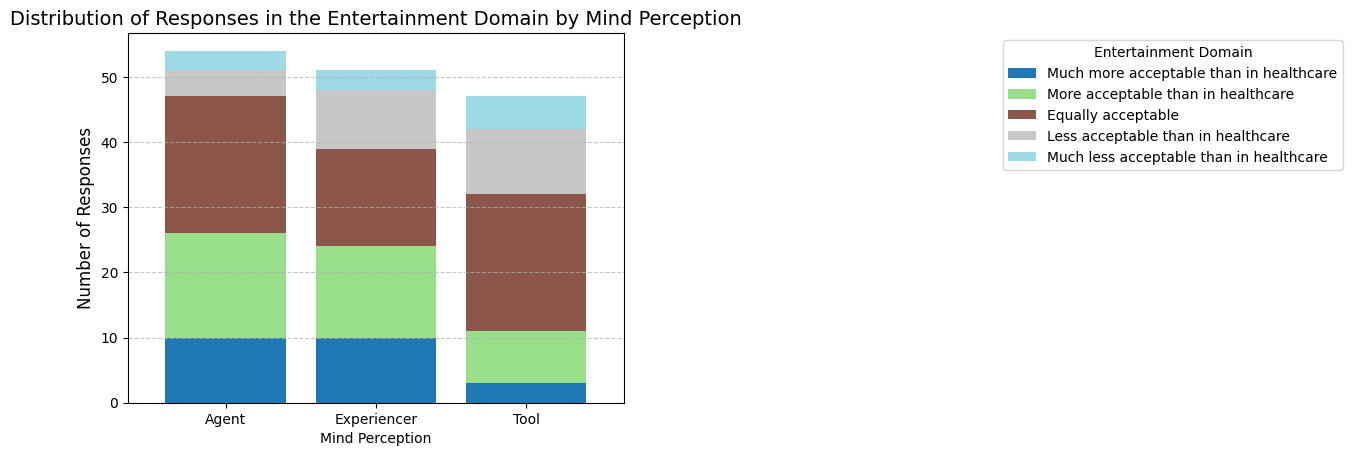

In [56]:
# Rename columns for readability
finaldata2 = finaldata.rename(columns={
    'v_171': 'Entertainment Domain'
})

# Simplify the 'Mind Perception' labels
finaldata2['Mind Perception'] = finaldata2['Mind Perception'].replace({
    'AI as a Tool': 'Tool',
    'AI as an Agent': 'Agent',
    'AI as an Experiencer': 'Experiencer'
})

# Create a mapping for the response options
entertainment_mapping = {
    1: 'Much more acceptable than in healthcare',
    2: 'More acceptable than in healthcare',
    3: 'Equally acceptable',
    4: 'Less acceptable than in healthcare',
    5: 'Much less acceptable than in healthcare'
}

# Define the desired order for the response categories
entertainment_order = [
    'Much more acceptable than in healthcare',
    'More acceptable than in healthcare',
    'Equally acceptable',
    'Less acceptable than in healthcare',
    'Much less acceptable than in healthcare'
]

# Map the responses to the actual values
finaldata2['Entertainment Domain'] = finaldata2['Entertainment Domain'].map(entertainment_mapping)

# Function to display distribution of responses by group with specified order
def display_ordered_distribution_by_group(column, order):
    group_distribution = finaldata2.groupby(['Mind Perception', column]).size().unstack(fill_value=0)
    group_distribution = group_distribution[order]  # Re-order columns as per specified order
    return group_distribution

# Calculate and display distributions for the entertainment industry question by group in specified order
entertainment_distribution_ordered = display_ordered_distribution_by_group('Entertainment Domain', entertainment_order)

# Display the distribution in a single readable table
print("\nDistribution for Entertainment Domain by Mind Perception:")
print(entertainment_distribution_ordered)

# Plotting the distribution
plt.figure(figsize=(20, 16))
entertainment_distribution_ordered.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)

plt.title('Distribution of Responses in the Entertainment Domain by Mind Perception', fontsize=14)
plt.xlabel('Mind Perception', fontsize=10)
plt.ylabel('Number of Responses', fontsize=12)
plt.legend(title='Entertainment Domain', bbox_to_anchor=(1.75, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot if needed
# plt.savefig('entertainment_domain_distribution.png')

plt.show()

In [57]:
# Calculate mean and standard deviation for 'Entertainment Domain' responses across groups
def calculate_stats(column):
    # Map the responses back to numeric values for calculation
    reverse_mapping = {v: k for k, v in entertainment_mapping.items()}
    finaldata2[column + '_Numeric'] = finaldata2[column].map(reverse_mapping)
    
    stats = finaldata2.groupby('Mind Perception')[column + '_Numeric'].agg(['mean', 'std']).reset_index()
    general_stats = finaldata2[column + '_Numeric'].agg(['mean', 'std'])
    return stats, general_stats

# Calculating the mean and standard deviation for Entertainment Domain across groups
entertainment_stats, general_entertainment_stats = calculate_stats('Entertainment Domain')

# Display the results
print("\nEntertainment Domain - Mean and Standard Deviation by Group:")
print(entertainment_stats)
print("\nGeneral Mean and Standard Deviation for Entertainment Domain:")
print(general_entertainment_stats)


Entertainment Domain - Mean and Standard Deviation by Group:
  Mind Perception      mean       std
0           Agent  2.518519  1.059383
1     Experiencer  2.627451  1.165518
2            Tool  3.127660  1.034556

General Mean and Standard Deviation for Entertainment Domain:
mean    2.743421
std     1.112819
Name: Entertainment Domain_Numeric, dtype: float64


# Perceived Humanness

In [58]:
# Rename columns for readability
finaldata3 = finaldata.rename(columns={
    'v_152': 'Caregiver Resemblance',
    'v_184': 'Humanlike Perception'
})

# Create a mapping for the response options
response_mapping = {
    1: 'Not at all',
    2: 'Slightly',
    3: 'Neutral',
    4: 'Somewhat',
    5: 'Extremely'
}

# Map the responses to the actual values
finaldata3['Caregiver Resemblance Category'] = finaldata3['Caregiver Resemblance'].map(response_mapping)
finaldata3['Humanlike Perception Category'] = finaldata3['Humanlike Perception'].map(response_mapping)

# Define the desired order for the response categories
response_order = ['Extremely', 'Somewhat', 'Neutral', 'Slightly', 'Not at all']

# Function to display distribution of responses by group with specified order
def display_ordered_distribution_by_group(column, order):
    group_distribution = finaldata3.groupby(['Mind Perception', column]).size().unstack(fill_value=0)
    group_distribution = group_distribution[order]  # Re-order columns as per specified order
    return group_distribution

# Calculate and display distributions for caregiver resemblance and humanlike perception by group in specified order
caregiver_distribution_ordered = display_ordered_distribution_by_group('Caregiver Resemblance Category', response_order)
humanlike_distribution_ordered = display_ordered_distribution_by_group('Humanlike Perception Category', response_order)

print(caregiver_distribution_ordered)
print(humanlike_distribution_ordered)

# Function to calculate the mean and standard deviation across groups for a given column
def calculate_stats(column):
    stats = finaldata3.groupby('Mind Perception')[column].agg(['mean', 'std']).reset_index()
    general_stats = finaldata3[column].agg(['mean', 'std'])
    return stats, general_stats

# Calculating the mean and standard deviation for Caregiver Resemblance and Humanlike Perception across groups
caregiver_stats, general_caregiver_stats = calculate_stats('Caregiver Resemblance')
humanlike_stats, general_humanlike_stats = calculate_stats('Humanlike Perception')

# Display the results
print("Caregiver Resemblance - Mean and Standard Deviation by Group:")
print(caregiver_stats)
print("\nGeneral Mean and Standard Deviation for Caregiver Resemblance:")
print(general_caregiver_stats)

print("\nHumanlike Perception - Mean and Standard Deviation by Group:")
print(humanlike_stats)
print("\nGeneral Mean and Standard Deviation for Humanlike Perception:")
print(general_humanlike_stats)

Caregiver Resemblance Category  Extremely  Somewhat  Neutral  Slightly  \
Mind Perception                                                          
AI as a Tool                            1         7       21        12   
AI as an Agent                          0         5       27        15   
AI as an Experiencer                    4         9       20        15   

Caregiver Resemblance Category  Not at all  
Mind Perception                             
AI as a Tool                             6  
AI as an Agent                           7  
AI as an Experiencer                     3  
Humanlike Perception Category  Extremely  Somewhat  Neutral  Slightly  \
Mind Perception                                                         
AI as a Tool                           0         5       15        13   
AI as an Agent                         0         7        9        18   
AI as an Experiencer                   3         5       16        12   

Humanlike Perception Category  Not at 

# Manipulation Check (Attention Check 1)

In [59]:
# Rename columns for readability
finaldata4 = finaldata.rename(columns={
    'v_127': 'Attention Check 1'
})

# Simplify the 'Mind Perception' labels
finaldata4['Mind Perception'] = finaldata4['Mind Perception'].replace({
    'AI as a Tool': 'Tool',
    'AI as an Agent': 'Agent',
    'AI as an Experiencer': 'Experiencer'
})

# Create a mapping for the response options
attention_check_mapping = {
    1: 'Tool',
    2: 'Agent',
    3: 'Experiencer'
}

# Map the responses to the actual values
finaldata4['Attention Check 1'] = finaldata4['Attention Check 1'].map(attention_check_mapping)

# Function to display distribution of responses by group
def display_distribution_by_group(column):
    group_distribution = finaldata4.groupby(['Mind Perception', column]).size().unstack(fill_value=0)
    return group_distribution

# Calculate and display distributions for the attention check question by group
attention_check_distribution = display_distribution_by_group('Attention Check 1')

# Display the distribution in a readable table
print("\nDistribution for Attention Check 1 by Mind Perception:")
print(attention_check_distribution)

# Function to count mismatches
def count_mismatches(df):
    mismatches = df[df['Mind Perception'] != df['Attention Check 1']]
    mismatch_counts = mismatches.groupby(['Mind Perception', 'Attention Check 1']).size().unstack(fill_value=0)
    return mismatch_counts

# Calculate mismatches
mismatch_distribution = count_mismatches(finaldata4)

# Display the mismatch distribution
print("\nMismatch Distribution for Attention Check 1 by Mind Perception:")
print(mismatch_distribution)


Distribution for Attention Check 1 by Mind Perception:
Attention Check 1  Agent  Experiencer  Tool
Mind Perception                            
Agent                 13            0    41
Experiencer           11            7    33
Tool                   4            3    40

Mismatch Distribution for Attention Check 1 by Mind Perception:
Attention Check 1  Agent  Experiencer  Tool
Mind Perception                            
Agent                  0            0    41
Experiencer           11            0    33
Tool                   4            3     0


# Sociodemographic Data

In [60]:
# Rename columns for readability
finaldata5 = finaldata.rename(columns={
    'v_173': 'Proficiency with Tech',
    'v_174': 'Familiarity with AI',
    'v_175': 'Healthcare Background',
    'v_176': 'Education',
    'v_178': 'Country'
})

# Create mappings for the response options
proficiency_mapping = {
    1: 'Not Proficient at All',
    2: 'Slightly Proficient',
    3: 'Moderately Proficient',
    4: 'Very Proficient',
    5: 'Extremely Proficient'
}

familiarity_mapping = {
    1: 'Not familiar at all',
    2: 'Slightly familiar',
    3: 'Moderately familiar',
    4: 'Very familiar',
    5: 'Extremely familiar'
}

healthcare_mapping = {
    1: 'Yes',
    2: 'No'
}

education_mapping = {
    1: 'Doctorate or higher',
    2: "Master's Degree",
    3: "Bachelor's Degree",
    4: "A High School Diploma (or comparable education)",
    5: "Trade/Technical/Vocational Training",
    6: "A-level/Diploma (or comparable education)",
    7: "School Level/Matura",
    8: "Other (Please specify)"
}

country_mapping = {
    6: 'Afghanistan',
    7: 'Albania',
    8: 'Algeria',
    9: 'Andorra',
    10: 'Angola',
    11: 'Antigua & Deps',
    12: 'Argentina',
    13: 'Armenia',
    14: 'Australia',
    15: 'Austria',
    16: 'Azerbaijan',
    17: 'Bahamas',
    18: 'Bahrain',
    19: 'Bangladesh',
    20: 'Barbados',
    21: 'Belarus',
    22: 'Belgium',
    23: 'Belize',
    24: 'Benin',
    25: 'Bhutan',
    26: 'Bolivia',
    27: 'Bosnia Herzegovina',
    28: 'Botswana',
    29: 'Brazil',
    30: 'Brunei',
    31: 'Bulgaria',
    32: 'Burkina',
    33: 'Burundi',
    34: 'Cambodia',
    35: 'Cameroon',
    36: 'Canada',
    37: 'Cape Verde',
    38: 'Central African Rep',
    39: 'Chad',
    40: 'Chile',
    41: 'China',
    42: 'Colombia',
    43: 'Comoros',
    44: 'Congo',
    45: 'Congo {Democratic Rep}',
    46: 'Costa Rica',
    47: 'Croatia',
    48: 'Cuba',
    49: 'Cyprus',
    50: 'Czech Republic',
    51: 'Denmark',
    52: 'Djibouti',
    53: 'Dominica',
    54: 'Dominican Republic',
    55: 'East Timor',
    56: 'Ecuador',
    57: 'Egypt',
    58: 'El Salvador',
    59: 'Equatorial Guinea',
    60: 'Eritrea',
    61: 'Estonia',
    62: 'Ethiopia',
    63: 'Fiji',
    64: 'Finland',
    65: 'France',
    66: 'Gabon',
    67: 'Gambia',
    68: 'Georgia',
    69: 'Germany',
    70: 'Ghana',
    71: 'Greece',
    72: 'Grenada',
    73: 'Guatemala',
    74: 'Guinea',
    75: 'Guinea-Bissau',
    76: 'Guyana',
    77: 'Haiti',
    78: 'Honduras',
    79: 'Hungary',
    80: 'Iceland',
    81: 'India',
    82: 'Indonesia',
    83: 'Iran',
    84: 'Iraq',
    85: 'Ireland {Republic}',
    86: 'Israel',
    87: 'Italy',
    88: 'Ivory Coast',
    89: 'Jamaica',
    90: 'Japan',
    91: 'Jordan',
    92: 'Kazakhstan',
    93: 'Kenya',
    94: 'Kiribati',
    95: 'Korea North',
    96: 'Korea South',
    97: 'Kosovo',
    98: 'Kuwait',
    99: 'Kyrgyzstan',
    100: 'Laos',
    101: 'Latvia',
    102: 'Lebanon',
    103: 'Lesotho',
    104: 'Liberia',
    105: 'Libya',
    106: 'Liechtenstein',
    107: 'Lithuania',
    108: 'Luxembourg',
    109: 'Macedonia',
    110: 'Madagascar',
    111: 'Malawi',
    112: 'Malaysia',
    113: 'Maldives',
    114: 'Mali',
    115: 'Malta',
    116: 'Marshall Islands',
    117: 'Mauritania',
    118: 'Mauritius',
    119: 'Mexico',
    120: 'Micronesia',
    121: 'Moldova',
    122: 'Monaco',
    123: 'Mongolia',
    124: 'Montenegro',
    125: 'Morocco',
    126: 'Mozambique',
    127: 'Myanmar, {Burma}',
    128: 'Namibia',
    129: 'Nauru',
    130: 'Nepal',
    131: 'Netherlands',
    132: 'New Zealand',
    133: 'Nicaragua',
    134: 'Niger',
    135: 'Nigeria',
    136: 'Norway',
    137: 'Oman',
    138: 'Pakistan',
    139: 'Palau',
    140: 'Panama',
    141: 'Papua New Guinea',
    142: 'Paraguay',
    143: 'Peru',
    144: 'Philippines',
    145: 'Poland',
    146: 'Portugal',
    147: 'Qatar',
    148: 'Romania',
    149: 'Russian Federation',
    150: 'Rwanda',
    151: 'St Kitts & Nevis',
    152: 'St Lucia',
    153: 'Saint Vincent & the Grenadines',
    154: 'Samoa',
    155: 'San Marino',
    156: 'Sao Tome & Principe',
    157: 'Saudi Arabia',
    158: 'Senegal',
    159: 'Serbia',
    160: 'Seychelles',
    161: 'Sierra Leone',
    162: 'Singapore',
    163: 'Slovakia',
    164: 'Slovenia',
    165: 'Solomon Islands',
    166: 'Somalia',
    167: 'South Africa',
    168: 'South Sudan',
    169: 'Spain',
    170: 'Sri Lanka',
    171: 'Sudan',
    172: 'Suriname',
    173: 'Swaziland',
    174: 'Sweden',
    175: 'Switzerland',
    176: 'Syria',
    177: 'Taiwan',
    178: 'Tajikistan',
    179: 'Tanzania',
    180: 'Thailand',
    181: 'Togo',
    182: 'Tonga',
    183: 'Trinidad & Tobago',
    184: 'Tunisia',
    185: 'Turkey',
    186: 'Turkmenistan',
    187: 'Tuvalu',
    188: 'Uganda',
    189: 'Ukraine',
    190: 'United Arab Emirates',
    191: 'United Kingdom',
    192: 'United States',
    193: 'Uruguay',
    194: 'Uzbekistan',
    195: 'Vanuatu',
    196: 'Vatican City',
    197: 'Venezuela',
    198: 'Vietnam',
    199: 'Yemen',
    200: 'Zambia',
    201: 'Zimbabwe'
}

# Apply mappings
finaldata5['Proficiency with Tech'] = finaldata5['Proficiency with Tech'].map(proficiency_mapping)
finaldata5['Familiarity with AI'] = finaldata5['Familiarity with AI'].map(familiarity_mapping)
finaldata5['Healthcare Background'] = finaldata5['Healthcare Background'].map(healthcare_mapping)
finaldata5['Education'] = finaldata5['Education'].map(education_mapping)
finaldata5['Country'] = finaldata5['Country'].map(country_mapping)

# List of columns to analyze
columns_to_analyze = ['Proficiency with Tech', 'Familiarity with AI', 'Healthcare Background', 'Education', 'Country']

# Function to display distribution of responses
def display_distribution(column):
    distribution = finaldata5[column].value_counts().sort_index()
    print(f"\nDistribution for {column}:")
    print(distribution)

# Calculate and display distributions for each column
for column in columns_to_analyze:
    display_distribution(column)


Distribution for Proficiency with Tech:
Proficiency with Tech
Extremely Proficient     23
Moderately Proficient    48
Not Proficient at All     1
Slightly Proficient      12
Very Proficient          68
Name: count, dtype: int64

Distribution for Familiarity with AI:
Familiarity with AI
Extremely familiar      9
Moderately familiar    58
Not familiar at all     5
Slightly familiar      31
Very familiar          49
Name: count, dtype: int64

Distribution for Healthcare Background:
Healthcare Background
No     123
Yes     29
Name: count, dtype: int64

Distribution for Education:
Education
A High School Diploma (or comparable education)    36
A-level/Diploma (or comparable education)           5
Bachelor's Degree                                  50
Doctorate or higher                                 8
Master's Degree                                    40
School Level/Matura                                 6
Trade/Technical/Vocational Training                 7
Name: count, dtype: int64

D